In [5]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import ResNet50V2
from keras import layers
from tensorflow import data as tf_data
import os
import random

In [6]:
import zipfile

In [7]:
import shutil

### Data Loading

In [8]:
zip_file_path = "/content/CSAFE_Handwriting_Images.zip"
extract_to_path = "/content/Data"

In [9]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [10]:
source_dir = "/content/Data"
dest_dir = source_dir

os.makedirs(dest_dir, exist_ok=True)

for filename in os.listdir(source_dir):
    if filename.endswith(".png"):
        # Extract writer ID from filename, assumes format "wxxxx_syy_pzzz_rqq"
        writer_id = filename.split("_")[0]  # 'wxxxx'

        writer_folder = os.path.join(dest_dir, writer_id)
        os.makedirs(writer_folder, exist_ok=True)

        src_path = os.path.join(source_dir, filename)
        dest_path = os.path.join(writer_folder, filename)

        shutil.move(src_path, dest_path)

In [11]:
os.listdir(f"{dest_dir}/w0001") #get list of files in directory

['w0001_s03_pWOZ_r03.png',
 'w0001_s01_pLND_r01.png',
 'w0001_s01_pLND_r03.png',
 'w0001_s03_pPHR_r03.png',
 'w0001_s03_pLND_r01.png',
 'w0001_s01_pPHR_r03.png',
 'w0001_s03_pLND_r03.png',
 'w0001_s01_pWOZ_r03.png',
 'w0001_s02_pPHR_r01.png',
 'w0001_s03_pPHR_r02.png',
 'w0001_s03_pWOZ_r02.png',
 'w0001_s02_pWOZ_r02.png',
 'w0001_s02_pWOZ_r01.png',
 'w0001_s03_pPHR_r01.png',
 'w0001_s01_pWOZ_r02.png',
 'w0001_s01_pWOZ_r01.png',
 'w0001_s02_pWOZ_r03.png',
 'w0001_s01_pPHR_r02.png',
 'w0001_s01_pPHR_r01.png',
 'w0001_s02_pPHR_r03.png',
 'w0001_s03_pLND_r02.png',
 'w0001_s02_pLND_r03.png',
 'w0001_s02_pLND_r02.png',
 'w0001_s02_pPHR_r02.png',
 'w0001_s02_pLND_r01.png',
 'w0001_s03_pWOZ_r01.png',
 'w0001_s01_pLND_r02.png']

In [12]:
w_ids = os.listdir("/content/Data")
w_ids.sort()
w_ids[:5]

['CSAFE_Handwriting_Info.csv', 'w0001', 'w0002', 'w0003', 'w0004']

In [13]:
w_ids.pop(0)
w_ids[:5]

['w0001', 'w0002', 'w0003', 'w0004', 'w0005']

In [60]:
w_ids

['w0001',
 'w0002',
 'w0003',
 'w0004',
 'w0005',
 'w0006',
 'w0009',
 'w0010',
 'w0011',
 'w0012',
 'w0013',
 'w0015',
 'w0016',
 'w0017',
 'w0018',
 'w0020',
 'w0022',
 'w0023',
 'w0024',
 'w0025',
 'w0026',
 'w0027',
 'w0028',
 'w0029',
 'w0030',
 'w0031',
 'w0032',
 'w0033',
 'w0034',
 'w0035',
 'w0036',
 'w0038',
 'w0043',
 'w0061',
 'w0062',
 'w0063',
 'w0064',
 'w0066',
 'w0069',
 'w0070',
 'w0071',
 'w0073',
 'w0074',
 'w0075',
 'w0076',
 'w0077',
 'w0078',
 'w0080',
 'w0082',
 'w0083',
 'w0085',
 'w0086',
 'w0087',
 'w0088',
 'w0089',
 'w0091',
 'w0092',
 'w0093',
 'w0094',
 'w0095',
 'w0121',
 'w0122',
 'w0123',
 'w0124',
 'w0125',
 'w0126',
 'w0128',
 'w0129',
 'w0130',
 'w0131',
 'w0133',
 'w0134',
 'w0135',
 'w0136',
 'w0137',
 'w0138',
 'w0139',
 'w0142',
 'w0143',
 'w0144',
 'w0145',
 'w0147',
 'w0148',
 'w0149',
 'w0151',
 'w0152',
 'w0153',
 'w0154',
 'w0155',
 'w0156']

In [14]:
len(w_ids)

90

In [15]:
round(27*0.8)

22

In [16]:
source_dir

'/content/Data'

In [17]:
for writer in w_ids:
    writer_path = f"{source_dir}/{writer}"

    writer_images = os.listdir(writer_path) #list of all images for writer

    #shuffle images
    random.shuffle(writer_images)

    train_set = writer_images[:22] #80/20 split --> 22/5
    val_set = writer_images[22:]

    #create sub directories in writer folders
    train_folder = os.path.join(source_dir, "train")
    val_folder = os.path.join(source_dir, "val")
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(val_folder, exist_ok=True)

    for image in train_set: #loop over every image for training in og place
        path = os.path.join(writer_path,image) #image og path
        destination = os.path.join(train_folder,writer)
        os.makedirs(destination, exist_ok=True)

        shutil.move(path, destination) #move to writer directory in train folder

    for image in val_set:
        path = os.path.join(writer_path,image)
        destination = os.path.join(val_folder,writer)
        os.makedirs(destination, exist_ok=True)

        shutil.move(path, destination)


In [39]:
#modularize

module = """
import os
import shutil
import zipfile

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from tensorflow import data as tf_data
import os
import random


def stratify_split(source_dir):
    '''Re-organizes images in writer folders into train/val folders with writer sub-directories'''
    for writer in w_ids:
        writer_path = f"{source_dir}/{writer}"

        writer_images = os.listdir(writer_path) #list of all images for writer

        #shuffle images
        random.shuffle(writer_images)

        train_set = writer_images[:22] #80/20 split --> 22/5
        val_set = writer_images[22:]

        #create sub directories in writer folders
        train_folder = os.path.join(source_dir, "train")
        val_folder = os.path.join(source_dir, "val")
        os.makedirs(train_folder, exist_ok=True)
        os.makedirs(val_folder, exist_ok=True)

        for image in train_set: #loop over every image for training in og place
            path = os.path.join(writer_path,image) #image og path
            destination = os.path.join(train_folder,writer)
            os.makedirs(destination, exist_ok=True)

            shutil.move(path, destination) #move to writer directory in train folder

        for image in val_set:
            path = os.path.join(writer_path,image)
            destination = os.path.join(val_folder,writer)
            os.makedirs(destination, exist_ok=True)

            shutil.move(path, destination)

def del_old_writer_directories(source_dir)
    '''Deletes original writer-organized directories (for use after creating train/val directories with stratify_split())'''
    for writer in w_ids: #delete old writer folders
        try:
            os.rmdir(f"{source_dir}/{writer}")
        except:
            pass


def organize_unzipped_files(source_dir):
    '''Organizes raw unzipped files into writer folders'''
    dest_dir = source_dir

    os.makedirs(dest_dir, exist_ok=True)

    for filename in os.listdir(source_dir):
        if filename.endswith(".png"):
            # Extract writer ID from filename, assumes format "wxxxx_syy_pzzz_rqq"
            writer_id = filename.split("_")[0]  # 'wxxxx'

            writer_folder = os.path.join(dest_dir, writer_id)
            os.makedirs(writer_folder, exist_ok=True)

            src_path = os.path.join(source_dir, filename)
            dest_path = os.path.join(writer_folder, filename)

            shutil.move(src_path, dest_path)


def unzip(path_of_zipfile,source_dir):
    zip_file_path = path_of_zipfile
    extract_to_path = source_dir

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)


def train_val_split(source_dir,IMAGE_SIZE=(384,384),BATCH_SIZE=18):
    train_ds = tf.keras.utils.image_dataset_from_directory(
        f"{source_dir}/train",
        labels='inferred',
        color_mode='rgb',
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        )
    val_ds = tf.keras.utils.image_dataset_from_directory(
        f"{source_dir}/val",
        labels='inferred',
        color_mode='rgb',
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        )
    # Prefetching samples in GPU memory helps maximize GPU utilization.
    train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
    val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

    return train_ds,val_ds

###DATA AUGMENTATION
data_augmentation_layers = [
    layers.RandomRotation(0.02),
    layers.RandomCrop(120,120),
    layers.RandomContrast((0.2,0.5)),
    ]

def data_augmentation(images):
    '''Function for testing augmentations with test_augmentations(), not meant for use

    For applying augmentations, use: apply_augmentations()'''
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

def test_augmentation(train_ds):
    '''Visualizing augmentations with matplotlib'''
    plt.figure(figsize=(12, 12))
    for images, _ in train_ds.take(1):
        for i in range(9):
            augmented_images = data_augmentation(images)
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(np.array(augmented_images[0]).astype("uint8"),cmap="gray",interpolation="nearest")
            plt.axis("off")

def apply_augmentations():
    '''Apply `data_augmentation` to the training images.'''
    train_ds = train_ds.map(
        lambda img, label: (data_augmentation(img), label),
        num_parallel_calls=tf_data.AUTOTUNE,
        )
    return train_ds


#####################

def full_unzip_and_stratify(path_of_zipfile,source_dir,IMAGE_SIZE=(384,384),BATCH_SIZE=18):
    '''Starts with zipped file, divides unzipped images by author, splits sorted images into train/val images,
    creates & returns train/val datatsets'''

    unzip(path_of_zipfile,source_dir)
    organize_unzipped_files(source_dir)

    w_ids = os.listdir(source_dir)
    w_ids.sort()
    w_ids.pop(0)

    stratify_split(source_dir)
    del_old_writer_directories(source_dir)

    train_ds,val_ds = train_val_split(source_dir,IMAGE_SIZE,BATCH_SIZE)
    return train_ds,val_ds
    """

with open("reload_data.py", "w") as f:
    f.write(module)

In [18]:
w_ids[0]

'w0001'

In [19]:
for writer in w_ids: #delete old writer folders
    try:
        os.rmdir(f"{source_dir}/{writer}")
    except:
        pass

In [20]:
len(os.listdir(f"{source_dir}/train"))

90

In [21]:
IMAGE_SIZE = (384,384)
BATCH_SIZE = 18

    Tried both 512,512 and 448,448 (to preserve details); runtime crashed

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Data/train",
    labels='inferred',
    color_mode='rgb',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    #validation_split=0.001,
    #subset= "training",
    #seed=42
    )


val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Data/val",
    labels='inferred',
    color_mode='rgb',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    #validation_split=0.999,
    #subset= "validation",
    #seed=42
    )

Found 1980 files belonging to 90 classes.
Found 450 files belonging to 90 classes.


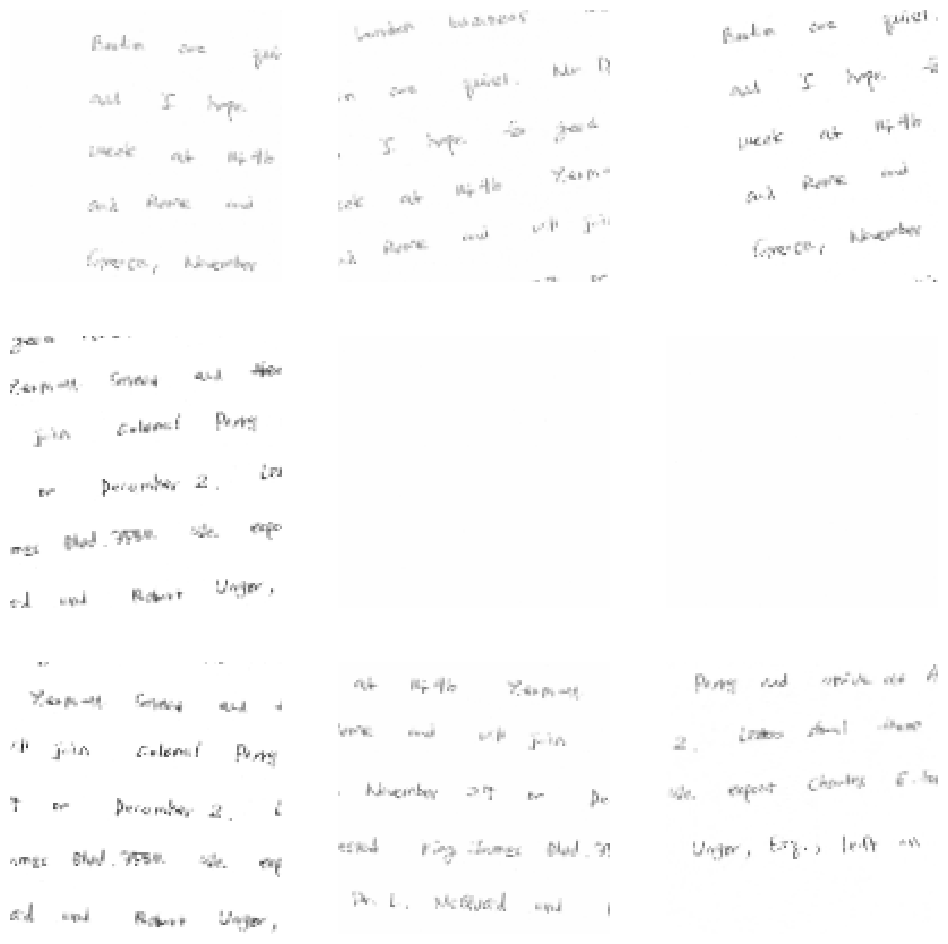

In [36]:
data_augmentation_layers = [
    layers.RandomRotation(0.02),
    layers.RandomCrop(120,120),
    #layers.RandomZoom(height_factor=(0.2, 0.5), width_factor=(0.2, 0.5)),
    layers.RandomContrast((0.2,0.5)),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images
plt.figure(figsize=(12, 12))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"),cmap="gray",interpolation="nearest")
        plt.axis("off")

    Concerns about cropping in too much whitespace ^^

### Modelling

In [24]:
from keras.applications import ResNet50V2

In [25]:
INPUT_SHAPE = IMAGE_SIZE + (3,)
INPUT_SHAPE

(384, 384, 3)

In [26]:
base_model = ResNet50V2(include_top = False,
                        classifier_activation="softmax",
                        weights = "imagenet",
                        input_shape=(IMAGE_SIZE + (3,))
                        )

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
def make_transfer_model(input_shape, num_classes):
    # Load the pre-trained weights of MobileNetV2 and freeze the weights
    backbone = base_model

    backbone.trainable = False

    inputs = layers.Input(input_shape)
    x = keras.applications.resnet.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.3)(x)

    x = layers.GlobalAveragePooling2D()(x)

    units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)

    return keras.Model(inputs, outputs, name="baseline")


model = make_transfer_model(input_shape=INPUT_SHAPE, num_classes=90)

In [28]:
from tensorflow import data as tf_data

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE) #train_ds = train_ds.cache().prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE) #val_ds = val_ds.cache().prefetch(tf_data.AUTOTUNE)

In [30]:
epochs = 8

callbacks = [keras.callbacks.ModelCheckpoint("save_at_epoch{epoch}.keras"),]

model.compile(
    optimizer= "adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )

history = model.fit(
    train_ds,
    epochs= epochs,
    callbacks= callbacks,
    validation_data= val_ds,)


Epoch 1/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1318s 11s/step - acc: 0.0137 - loss: 204.3426 - val_acc: 0.0267 - val_loss: 84.0643
Epoch 2/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1213s 11s/step - acc: 0.0188 - loss: 146.8028 - val_acc: 0.0289 - val_loss: 74.5194
Epoch 3/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1217s 11s/step - acc: 0.0181 - loss: 129.3695 - val_acc: 0.0467 - val_loss: 57.5946
Epoch 4/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1204s 11s/step - acc: 0.0262 - loss: 108.1314 - val_acc: 0.0556 - val_loss: 58.0634
Epoch 5/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1182s 11s/step - acc: 0.0295 - loss: 97.3620 - val_acc: 0.0622 - val_loss: 58.4678
Epoch 6/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1174s 11s/step - acc: 0.0393 - loss: 94.1903 - val_acc: 0.0756 - val_loss: 53.2132
Epoch 7/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1238s 11s/step - acc: 0.0504 - loss: 80.8367 - val_acc: 0.0689 - val_loss: 56.1939
Epoch 8/8
110/110 ━━━━━━━━━━━━━━━━━━━━ 1217s 11s/step - acc: 0.0582 - loss: 78.1769 - val_acc: 0.0956 - val_loss: 56.5942


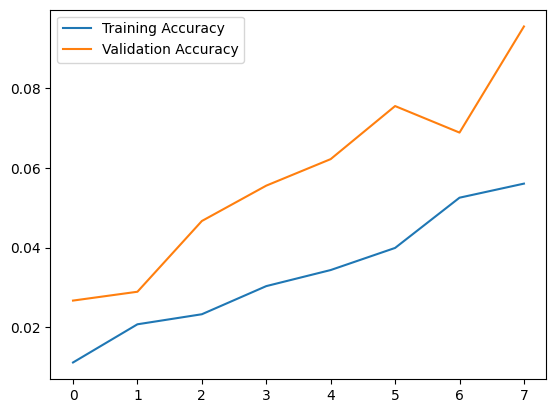

In [35]:
plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Accuracy")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Accuracy")
plt.legend()
plt.show()

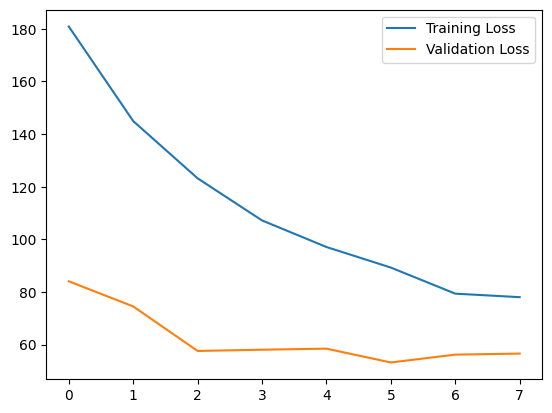

In [34]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

In [33]:
model.save("/content/BaseModel_colab.keras")

### Augmentations

In [40]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

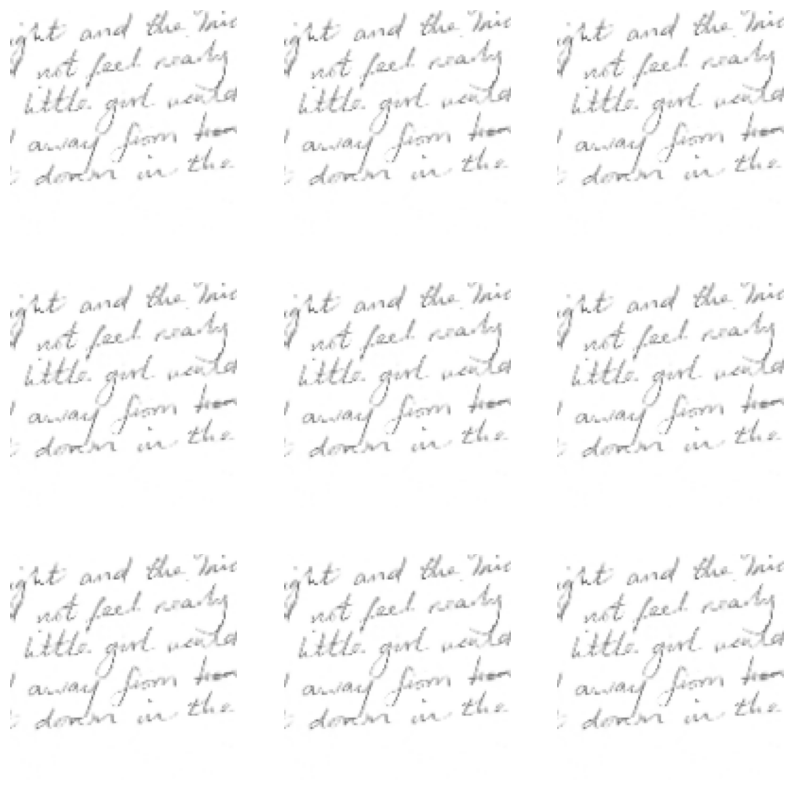

In [59]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
    for i in range(9):
        #augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[0]).astype("uint8"))
        plt.axis("off")
plt.show()

In [50]:
epochs = 12

In [51]:
history = model.fit(
    train_ds,
    epochs= epochs,
    callbacks= callbacks,
    validation_data= val_ds,)

model.save("/content/Augmented_BaseModel_colab.keras")

Epoch 1/12
110/110 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - acc: 0.0168 - loss: 96.2710 - val_acc: 0.0444 - val_loss: 77.5119
Epoch 2/12
110/110 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - acc: 0.0227 - loss: 89.6421 - val_acc: 0.0533 - val_loss: 74.4317
Epoch 3/12
110/110 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - acc: 0.0220 - loss: 89.1796 - val_acc: 0.0378 - val_loss: 77.8980
Epoch 4/12
110/110 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - acc: 0.0217 - loss: 89.4043 - val_acc: 0.0422 - val_loss: 64.0119
Epoch 5/12
110/110 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - acc: 0.0263 - loss: 89.7364 - val_acc: 0.0533 - val_loss: 62.8707
Epoch 6/12
110/110 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - acc: 0.0295 - loss: 88.0391 - val_acc: 0.0333 - val_loss: 85.6643
Epoch 7/12
110/110 ━━━━━━━━━━━━━━━━━━━━ 377s 3s/step - acc: 0.0172 - loss: 89.2015 - val_acc: 0.0333 - val_loss: 76.1969
Epoch 8/12
110/110 ━━━━━━━━━━━━━━━━━━━━ 378s 3s/step - acc: 0.0216 - loss: 81.6050 - val_acc: 0.0200 - val_loss: 69.0031
Epoch 9/12
110/110 ━━━━━━━━━━━━━

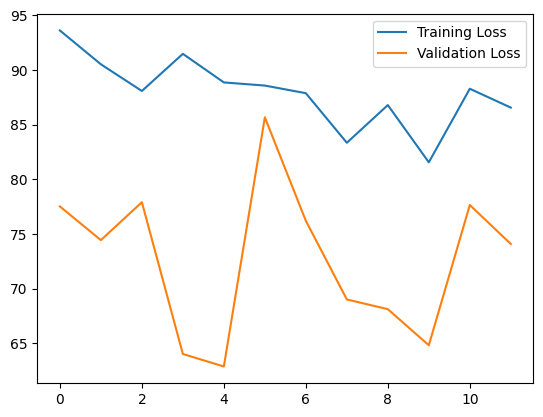

In [52]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

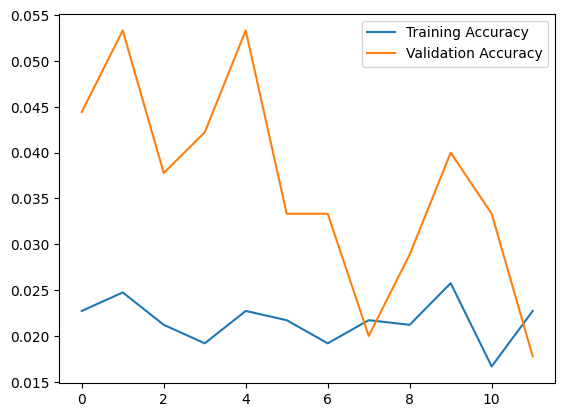

In [53]:
plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Accuracy")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Accuracy")
plt.legend()
plt.show()

    Validation accuracy is decreasing after augmentations applied to training data
        Try out different augmentations?